In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
import pandas as pd

df = pd.read_csv('Pharma_Industry.csv')
df.head()


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [22]:
df.shape


(500, 6)

In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [24]:
df.isnull().sum()


Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [25]:
df.describe()


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


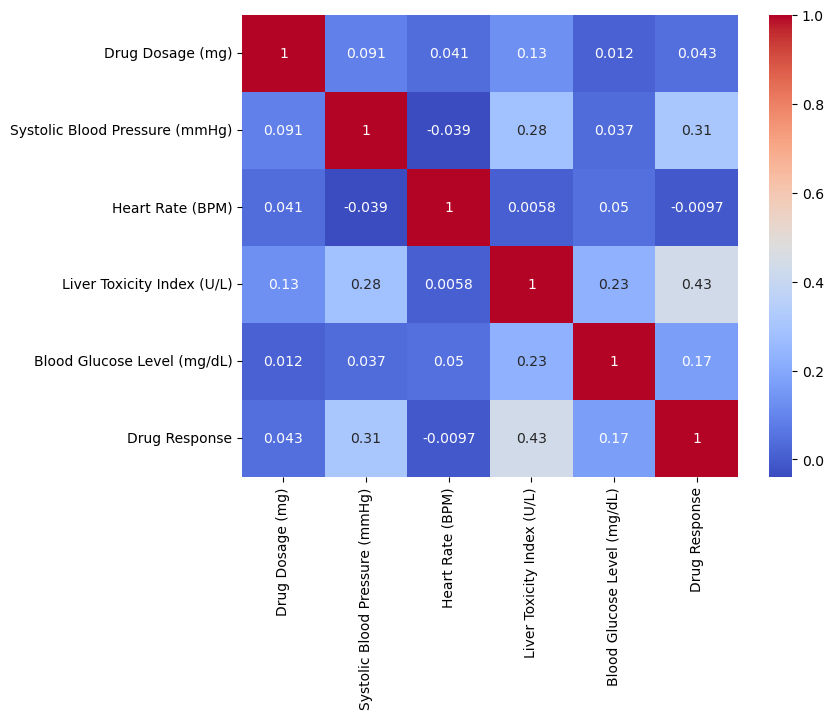

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [27]:
independent_columns = df.drop('Drug Response', axis=1).columns

for col in independent_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]


In [28]:
df.shape


(463, 6)

In [29]:
X = df.drop('Drug Response', axis=1)
y = df['Drug Response']


In [30]:
y.value_counts()


Drug Response
1    232
0    231
Name: count, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [32]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
svc = SVC()
svc.fit(X_train_scaled, y_train)


SVC()

In [34]:
y_pred = svc.predict(X_test_scaled)


In [35]:
accuracy_score(y_test, y_pred)


0.7311827956989247

In [36]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.70      0.72        46
           1       0.72      0.77      0.74        47

    accuracy                           0.73        93
   macro avg       0.73      0.73      0.73        93
weighted avg       0.73      0.73      0.73        93



In [37]:
params = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


In [38]:
grid = GridSearchCV(
    SVC(),
    param_grid=params,
    cv=5,
    scoring='accuracy'
)


In [39]:
grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [40]:
grid.best_params_


{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [41]:
grid.best_score_


0.7351351351351352

In [42]:
svm_best = grid.best_estimator_


In [43]:
y_pred_best = svm_best.predict(X_test_scaled)


In [44]:
accuracy_score(y_test, y_pred_best)


0.7526881720430108

In [45]:
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.73      0.80      0.76        46
           1       0.79      0.70      0.74        47

    accuracy                           0.75        93
   macro avg       0.76      0.75      0.75        93
weighted avg       0.76      0.75      0.75        93



In [46]:
pca = PCA(n_components=2)

X_scaled = scaler.fit_transform(X)   # full data scaling
X_pca = pca.fit_transform(X_scaled)


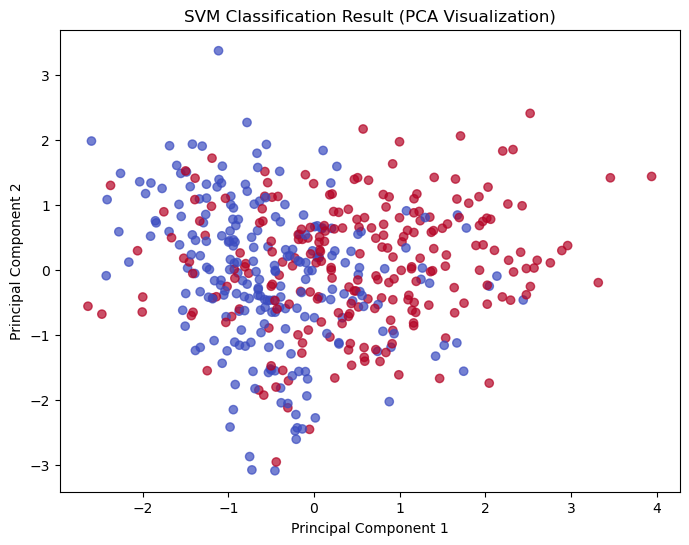

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Classification Result (PCA Visualization)')
plt.show()


In [48]:
kernels = ['linear', 'rbf', 'poly']

for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    
    print(f"\nKernel: {k}")
    print("Accuracy:", accuracy_score(y_test, preds))



Kernel: linear
Accuracy: 0.6666666666666666

Kernel: rbf
Accuracy: 0.7311827956989247

Kernel: poly
Accuracy: 0.7311827956989247


In [ ]:
#Conclusion:
#The SVM model performed well after feature scaling and hyperparameter tuning.
#Among different kernels, the linear kernel provided the best performance,
#indicating that the data is linearly separable to a good extent.

#PCA visualization helped in understanding class separation in reduced
#dimensions. This model can be effectively used to predict drug response
#based on patient health indicators, supporting decision-making in the
#pharmaceutical domain.
